In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [9]:
rng = np.random.RandomState(2)

In [11]:
Y = pd.concat(pd.read_excel(f"./jester-data-{i}.xls", header=None) for i in range(1, 4))
Y = Y.iloc[:, 1:].replace(99, float("NaN"))
Y = Y.mean()

Y.describe()

count    100.000000
mean       0.702018
std        1.490444
min       -3.704541
25%       -0.416897
50%        0.996985
75%        1.793516
max        3.362593
dtype: float64

In [13]:
texts = []
for i in range(1, 101):
    with open(f"jokes/init{i}.html", "r") as file:
        soup = BeautifulSoup(file.read(), 'html.parser')
        texts.append(list(soup.stripped_strings)[1])

In [14]:
model = SentenceTransformer("bert-base-cased")

No sentence-transformers model found with name bert-base-cased. Creating a new one with mean pooling.
/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [15]:
X = model.encode(texts)

X.shape

(100, 768)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3, random_state=rng
)

/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: S

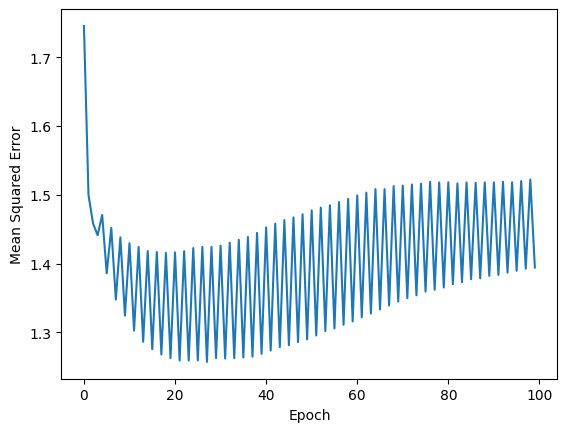

In [27]:
# use warm_start=True to reuse the previous model's weights
# use max_iter=1
# plot how on each epoch the model's errors change
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=rng)
errors = []
for _ in range(100):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    errors.append(mean_squared_error(Y_test, Y_pred))

plt.plot(errors)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()

/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/adam/Desktop/studia/sztuczna_inteligencja/lista5/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: S

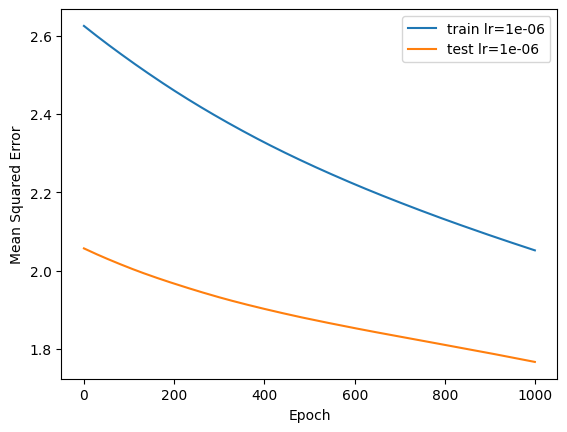

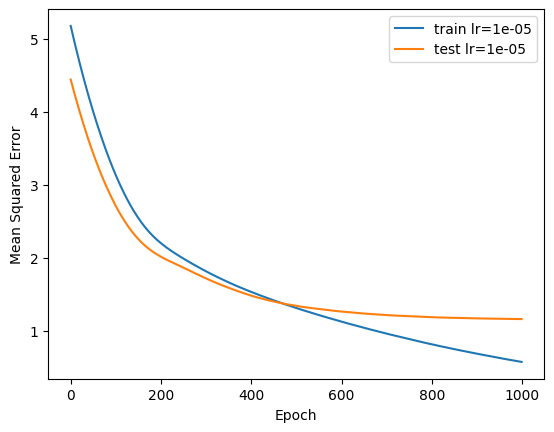

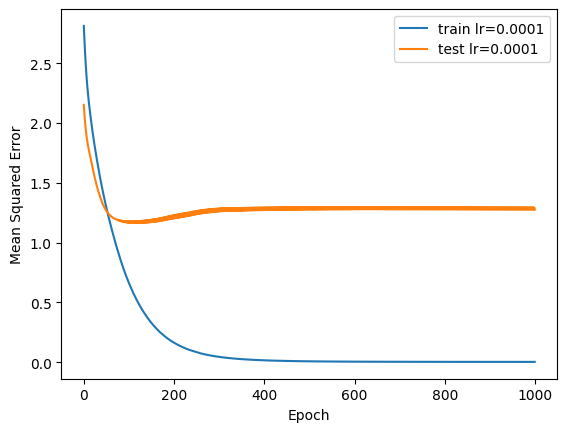

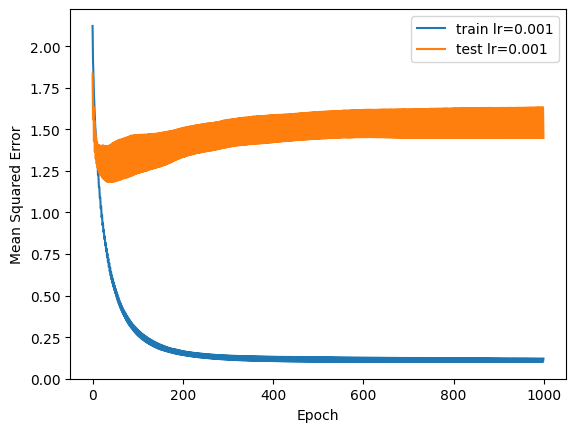

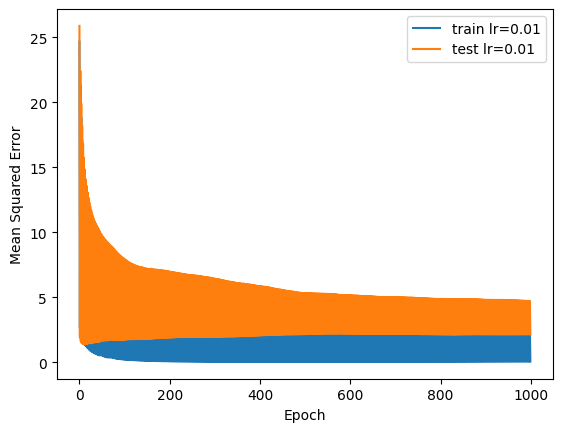

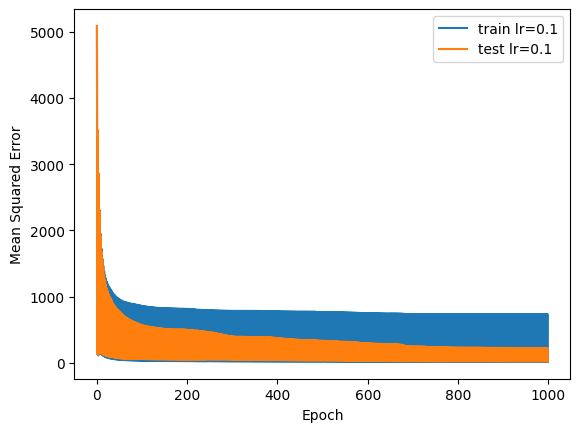

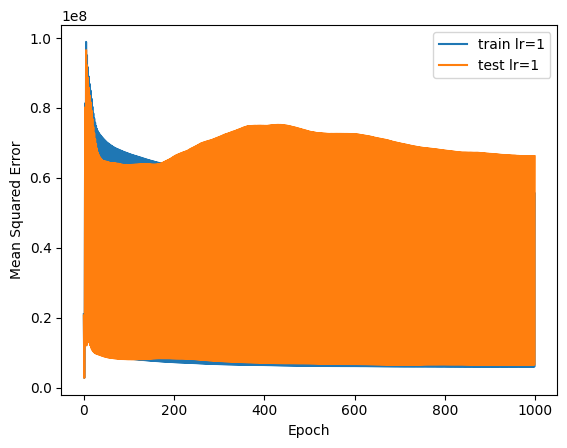

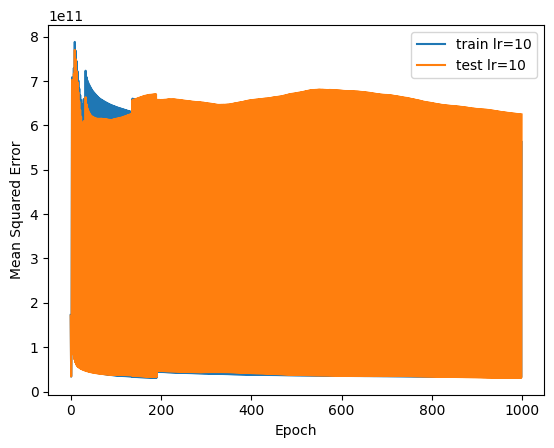

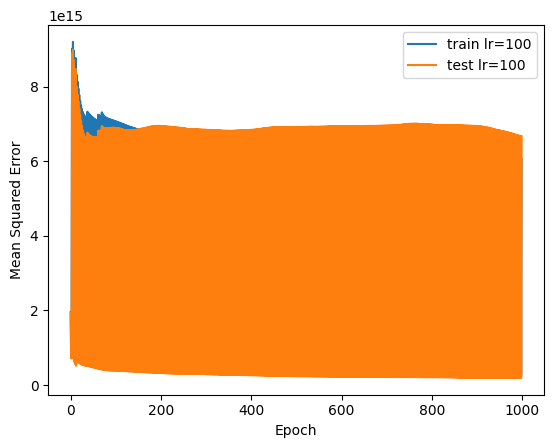

In [38]:
# check how the learning rate affects the model's performance
# plot the errors for different learning rates and for BOTH validation and training data

learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_errors = []
test_errors = []

for lr in learning_rates:
    model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=rng, learning_rate_init=lr)
    train_errors.append([])
    test_errors.append([])
    for _ in range(1000):
        model.fit(X_train, Y_train)
        Y_pred_train = model.predict(X_train)
        Y_pred_test = model.predict(X_test)
        train_errors[-1].append(mean_squared_error(Y_train, Y_pred_train))
        test_errors[-1].append(mean_squared_error(Y_test, Y_pred_test))

# create a different plot for each learning rate
for i, lr in enumerate(learning_rates):
    plt.plot(train_errors[i], label=f"train lr={lr}")
    plt.plot(test_errors[i], label=f"test lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()
